<img src='https://raw.githubusercontent.com/bradenrc/sparksql_pot/master/sparkSQL4.png' width="80%" height="80%"></img>

<img src='https://raw.githubusercontent.com/bradenrc/sparksql_pot/master/sparkSQL2.png' width="80%" height="80%"></img>

<img src='https://raw.githubusercontent.com/bradenrc/sparksql_pot/master/sparkSQL3.png' width="80%" height="80%"></img>

<img src='https://raw.githubusercontent.com/bradenrc/sparksql_pot/master/sparkSQL1.png' width="80%" height="80%"></img>




#Getting started:
Create a SQL Context from the Spark Context, sc, which is predefined in every notebook

In [1]:
#sqlContext is used for defining Dataframes and working with SparkSQL
#use sc to create our sqlContext, sc has the connection information for the
#Spark enviroment

from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

#SQL Context queries Dataframes, not RDDs.

A data file on world banks will downloaded from GitHub after removing any previous data that may exist


In [2]:
# In the Data Scientist Workbench (DSWB) you can prefice commands with a ! to run shell commands
# here we remove any files with the name of the file we are going to download
# then download the file

!rm world_bank.json.gz -f
!wget https://raw.githubusercontent.com/bradenrc/sparksql_pot/master/world_bank.json.gz

--2016-05-23 11:59:24--  https://raw.githubusercontent.com/bradenrc/sparksql_pot/master/world_bank.json.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 23.235.40.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|23.235.40.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 446287 (436K) [application/octet-stream]
Saving to: 'world_bank.json.gz'

100%[======================================>] 446,287     --.-K/s   in 0.1s    

2016-05-23 11:59:24 (3.45 MB/s) - 'world_bank.json.gz' saved [446287/446287]



#A Dataframe will be created using the sqlContext to read the file. Many other types are supported including text and Parquet

Here we are creating a Dataframe, similar to an RDD, but with a schema and abstraction that allows
for SQL to be used.

In [5]:
#You can load json, text and other files using sqlContext
#unlinke an RDD, this will attempt to create a schema around the data
#self describing data works really well for this

example1_df = sqlContext.read.json("./world_bank.json.gz")


#Spark SQL has the ability to infer the schema of JSON data and understand the structure of the data

In [6]:
#once we have created the Dataframe, we can print out the schema to see the shape of the data

print example1_df.printSchema()

root
 |-- _id: struct (nullable = true)
 |    |-- $oid: string (nullable = true)
 |-- approvalfy: string (nullable = true)
 |-- board_approval_month: string (nullable = true)
 |-- boardapprovaldate: string (nullable = true)
 |-- borrower: string (nullable = true)
 |-- closingdate: string (nullable = true)
 |-- country_namecode: string (nullable = true)
 |-- countrycode: string (nullable = true)
 |-- countryname: string (nullable = true)
 |-- countryshortname: string (nullable = true)
 |-- docty: string (nullable = true)
 |-- envassesmentcategorycode: string (nullable = true)
 |-- grantamt: long (nullable = true)
 |-- ibrdcommamt: long (nullable = true)
 |-- id: string (nullable = true)
 |-- idacommamt: long (nullable = true)
 |-- impagency: string (nullable = true)
 |-- lendinginstr: string (nullable = true)
 |-- lendinginstrtype: string (nullable = true)
 |-- lendprojectcost: long (nullable = true)
 |-- majorsector_percent: array (nullable = true)
 |    |-- element: struct (containsNu

#Let's take a look at the first two rows of data

The example below enumerates our "take" command that pulls 2 items from the Dataframe
<br>a simpiler option to see the data could also be:<br>

print example1_df.take(2)


In [7]:
for row in example1_df.take(2):
    print row
    print "*" * 20

Row(_id=Row($oid=u'52b213b38594d8a2be17c780'), approvalfy=u'1999', board_approval_month=u'November', boardapprovaldate=u'2013-11-12T00:00:00Z', borrower=u'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA', closingdate=u'2018-07-07T00:00:00Z', country_namecode=u'Federal Democratic Republic of Ethiopia!$!ET', countrycode=u'ET', countryname=u'Federal Democratic Republic of Ethiopia', countryshortname=u'Ethiopia', docty=u'Project Information Document,Indigenous Peoples Plan,Project Information Document', envassesmentcategorycode=u'C', grantamt=0, ibrdcommamt=0, id=u'P129828', idacommamt=130000000, impagency=u'MINISTRY OF EDUCATION', lendinginstr=u'Investment Project Financing', lendinginstrtype=u'IN', lendprojectcost=550000000, majorsector_percent=[Row(Name=u'Education', Percent=46), Row(Name=u'Education', Percent=26), Row(Name=u'Public Administration, Law, and Justice', Percent=16), Row(Name=u'Education', Percent=12)], mjsector_namecode=[Row(code=u'EX', name=u'Education'), Row(code=u'EX', name=u'E

#Now let's register a table which is a pointer to the Dataframe and allows data access via Spark SQL

In [8]:
#Simply use the Dataframe Object to create the table:
example1_df.registerTempTable("world_bank")


In [9]:
#now that the table is registered we can execute sql commands 
#NOTE that the returned object is another Dataframe:

temp_df =  sqlContext.sql("select * from world_bank limit 2")

print type(temp_df)
print "*" * 20
print temp_df

<class 'pyspark.sql.dataframe.DataFrame'>
********************
DataFrame[_id: struct<$oid:string>, approvalfy: string, board_approval_month: string, boardapprovaldate: string, borrower: string, closingdate: string, country_namecode: string, countrycode: string, countryname: string, countryshortname: string, docty: string, envassesmentcategorycode: string, grantamt: bigint, ibrdcommamt: bigint, id: string, idacommamt: bigint, impagency: string, lendinginstr: string, lendinginstrtype: string, lendprojectcost: bigint, majorsector_percent: array<struct<Name:string,Percent:bigint>>, mjsector_namecode: array<struct<code:string,name:string>>, mjtheme: array<string>, mjtheme_namecode: array<struct<code:string,name:string>>, mjthemecode: string, prodline: string, prodlinetext: string, productlinetype: string, project_abstract: struct<cdata:string>, project_name: string, projectdocs: array<struct<DocDate:string,DocType:string,DocTypeDesc:string,DocURL:string,EntityID:string>>, projectfinancialty

In [10]:
#one nice feature of the notebooks and python is that we can show it in a table via Pandas
sqlContext.sql("select id, borrower from world_bank limit 2").toPandas()

,id,borrower
0,P129828,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA
1,P144674,GOVERNMENT OF TUNISIA


In [11]:
#Here is a simple group by example:

query = """
select
    regionname ,
    count(*) as project_count
from world_bank
group by regionname 
order by count(*) desc
"""

sqlContext.sql(query).toPandas()


,regionname,project_count
0,Africa,152
1,East Asia and Pacific,100
2,Europe and Central Asia,74
3,South Asia,65
4,Middle East and North Africa,54
5,Latin America and Caribbean,53
6,Other,2


In [12]:
#subselect works as well:

query = """

select * from
    (select
        regionname ,
        count(*) as project_count
    from world_bank
    group by regionname 
    order by count(*) desc) table_alias
limit 2
"""

sqlContext.sql(query).toPandas()


,regionname,project_count
0,Africa,152
1,East Asia and Pacific,100


#Simple Example of Adding a Schema (headers) to an RDD and using it as a dataframe

In the example below a simple RDD is created with Random Data in two columns and an ID column.

In [13]:
import random

#first let's create a simple RDD

#create a Python list of lists for our example
data_e2 = []
for x in range(1,6):
    random_int = int(random.random() * 10)
    data_e2.append([x, random_int, random_int^2])

#create the RDD with the random list of lists
rdd_example2 = sc.parallelize(data_e2)
print rdd_example2.collect()


[[1, 4, 6], [2, 2, 0], [3, 1, 3], [4, 0, 2], [5, 5, 7]]


In [14]:
from pyspark.sql.types import *

#now we can assign some header information

# The schema is encoded in a string.
schemaString = "ID VAL1 VAL2"

fields = [StructField(field_name, StringType(), True) for field_name in schemaString.split()]
schema = StructType(fields)

# Apply the schema to the RDD.
schemaExample = sqlContext.createDataFrame(rdd_example2, schema)

# Register the DataFrame as a table.
schemaExample.registerTempTable("example2")

# Pull the data
print schemaExample.collect()



[Row(ID=u'1', VAL1=u'4', VAL2=u'6'), Row(ID=u'2', VAL1=u'2', VAL2=u'0'), Row(ID=u'3', VAL1=u'1', VAL2=u'3'), Row(ID=u'4', VAL1=u'0', VAL2=u'2'), Row(ID=u'5', VAL1=u'5', VAL2=u'7')]


In [15]:
#In Dataframes we can reference the columns names for example:

for row in schemaExample.take(2):
    print row.ID, row.VAL1, row.VAL2

1 4 6
2 2 0


In [16]:
#Again a simple sql example:

sqlContext.sql("select * from example2").toPandas()

,ID,VAL1,VAL2
0,1,4,6
1,2,2,0
2,3,1,3
3,4,0,2
4,5,5,7


#Another Example of creating a Dataframe from an RDD

In [17]:
#Remember this RDD:
print type(rdd_example2)
print rdd_example2.collect()


<class 'pyspark.rdd.RDD'>
[[1, 4, 6], [2, 2, 0], [3, 1, 3], [4, 0, 2], [5, 5, 7]]


In [18]:
#we can use Row to specify the name of the columns with a Map, then use that to create the Dataframe
from pyspark.sql import Row

rdd_example3 = rdd_example2.map(lambda x: Row(id=x[0], val1=x[1], val2=x[2]))

print rdd_example3.collect()
                                                             

[Row(id=1, val1=4, val2=6), Row(id=2, val1=2, val2=0), Row(id=3, val1=1, val2=3), Row(id=4, val1=0, val2=2), Row(id=5, val1=5, val2=7)]


In [19]:
#now we can convert rdd_example3 to a Dataframe

df_example3 = rdd_example3.toDF()
df_example3.registerTempTable("df_example3")

print type(df_example3)

<class 'pyspark.sql.dataframe.DataFrame'>


In [20]:
#now a simple SQL statement
sqlContext.sql("select * from df_example3").toPandas()

,id,val1,val2
0,1,4,6
1,2,2,0
2,3,1,3
3,4,0,2
4,5,5,7


#Joins are supported, here is a simple example with our two new tables
We can join example2 and example3 on ID

In [24]:
query = """
select
    *
from
    example2 e2
inner join df_example3 e3 on
    e2.ID = e3.id
"""

print sqlContext.sql(query).toPandas()

  ID VAL1 VAL2  id  val1  val2
0  1    4    6   1     4     6
1  3    1    3   3     1     3
2  5    5    7   5     5     7
3  4    0    2   4     0     2
4  2    2    0   2     2     0


In [27]:
#Alternatively you can join within Python as well (or Scala of course)

df_example4 = df_example3.join(schemaExample, schemaExample["ID"] == df_example3["id"] )

for row in df_example4.take(5):
    print row

Row(id=1, val1=4, val2=6, ID=u'1', VAL1=u'4', VAL2=u'6')
Row(id=3, val1=1, val2=3, ID=u'3', VAL1=u'1', VAL2=u'3')
Row(id=5, val1=5, val2=7, ID=u'5', VAL1=u'5', VAL2=u'7')
Row(id=4, val1=0, val2=2, ID=u'4', VAL1=u'0', VAL2=u'2')
Row(id=2, val1=2, val2=0, ID=u'2', VAL1=u'2', VAL2=u'0')


#Another powerful feature is the ability to create Functions and Use them in SQL Here is a simple example

First we create a function in Python, then register it using sqlContext allowing for us to call it via SQL

In [28]:
#first we create a Python function:

def simple_function(v):
    return int(v * 10)

#test the function
print simple_function(3)

30


In [29]:
#now we can register the function for use in SQL
sqlContext.registerFunction("simple_function", simple_function)

In [30]:
#now we can apply the filter in a SQL Statement
query = """
select
    ID,
    VAL1,
    VAL2,
    simple_function(VAL1) as s_VAL1,
    simple_function(VAL2) as s_VAL2
from
 example2
"""
sqlContext.sql(query).toPandas()

,ID,VAL1,VAL2,s_VAL1,s_VAL2
0,1,4,6,4444444444,6666666666
1,2,2,0,2222222222,0
2,3,1,3,1111111111,3333333333
3,4,0,2,0,2222222222
4,5,5,7,5555555555,7777777777


In [31]:
#note that the VAL1 and VAL2 look like strings, we can cast them as well
query = """
select
    ID,
    VAL1,
    VAL2,
    simple_function(cast(VAL1 as int)) as s_VAL1,
    simple_function(cast(VAL2 as int)) as s_VAL2
from
 example2
"""
sqlContext.sql(query).toPandas()

,ID,VAL1,VAL2,s_VAL1,s_VAL2
0,1,4,6,40,60
1,2,2,0,20,0
2,3,1,3,10,30
3,4,0,2,0,20
4,5,5,7,50,70


#Pandas Example
Pandas is a common abstraction for working with data in Python.

We can turn Pandas Dataframes into Spark Dataframes, the advantage of this 
could be scale or allowing us to run SQL statements agains the data.

In [32]:
#import pandas library
import pandas as pd
print pd

<module 'pandas' from '/usr/local/src/bluemix_ipythonspark_16/notebook/lib/python2.7/site-packages/pandas-0.14.0-py2.7-linux-x86_64.egg/pandas/__init__.pyc'>


###First, let's grab some UFO data to play with

In [33]:
!rm SIGHTINGS.csv -f
!wget https://www.quandl.com/api/v3/datasets/NUFORC/SIGHTINGS.csv

--2016-05-23 12:04:35--  https://www.quandl.com/api/v3/datasets/NUFORC/SIGHTINGS.csv
Resolving www.quandl.com (www.quandl.com)... 52.20.92.57, 50.19.196.158
Connecting to www.quandl.com (www.quandl.com)|52.20.92.57|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: 'SIGHTINGS.csv'

    [ <=>                                   ] 14,219      --.-K/s   in 0.03s   

2016-05-23 12:04:35 (455 KB/s) - 'SIGHTINGS.csv' saved [14219]



In [35]:
#using the CSV file from earlier, we can create a Pandas Dataframe:
pandas_df = pd.read_csv("./SIGHTINGS.csv")
pandas_df.head()

,Reports,Count
0,2016-05-31,196
1,2016-04-30,369
2,2016-03-31,391
3,2016-02-29,421
4,2016-01-31,409


In [36]:
#now convert to Spark Dataframe
spark_df = sqlContext.createDataFrame(pandas_df)

In [37]:
#explore the first two rows:

for row in spark_df.take(2):
    print row


Row(Reports=u'2016-05-31', Count=196.0)
Row(Reports=u'2016-04-30', Count=369.0)


In [38]:
#register the Spark Dataframe as a table
spark_df.registerTempTable("ufo_sightings")

In [39]:
#now a SQL statement
print sqlContext.sql("select * from ufo_sightings limit 10").collect()

[Row(Reports=u'2016-05-31', Count=196.0), Row(Reports=u'2016-04-30', Count=369.0), Row(Reports=u'2016-03-31', Count=391.0), Row(Reports=u'2016-02-29', Count=421.0), Row(Reports=u'2016-01-31', Count=409.0), Row(Reports=u'2015-12-31', Count=430.0), Row(Reports=u'2015-11-30', Count=897.0), Row(Reports=u'2015-10-31', Count=645.0), Row(Reports=u'2015-09-30', Count=720.0), Row(Reports=u'2015-08-31', Count=615.0)]


#Visualizing the Data
Here are some simple ways to create charts using Pandas output


In order to display in the notebook we need to tell matplotlib to render inline
at this point import the supporting libraries as well

In [40]:
%matplotlib inline 
import matplotlib.pyplot as plt, numpy as np

Pandas can call a function "plot" to create the charts.
Since most charts are created from aggregates the record
set should be small enough to store in Pandas

We can take our UFO data from before and create a 
Pandas Dataframe from the Spark Dataframe

In [41]:
ufos_df = spark_df.toPandas()

To plot we call the "plot" method and specify the type, x and y axis columns
and optionally the size of the chart.

Many more details can be found here:
http://pandas.pydata.org/pandas-docs/stable/visualization.html

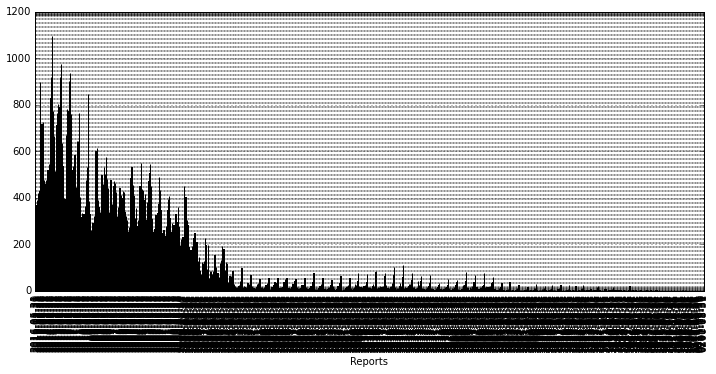

In [42]:
ufos_df.plot(kind='bar', x='Reports', y='Count', figsize=(12, 5))

###This doesn't look good, there are too many observations, let's check how many:

In [43]:
print sqlContext.sql("select count(*) from ufo_sightings limit 10").collect()

[Row(_c0=894)]


<h2>Ideally we could just group by year, there are many ways we could solve that:</h2>

1) parse the Reports column in SQL and output the year, then group on it
2) create a simple Python function to parse the year and call it via sql
3) as shown below: use map against the Dataframe and append a new column with "year"

Tge example below takes the existing data for each row and appends a new column "year" 
by taking the first for characters from the Reports column

Reports looks like this for example:
2016-01-31

In [47]:
ufos_df = spark_df.map(lambda x: Row(**dict(x.asDict(), year=int(x.Reports[0:4])))).toDF()

Quick check to verify we get the expected results

In [48]:
print ufos_df.take(5)

[Row(Count=196.0, Reports=u'2016-05-31', year=2016), Row(Count=369.0, Reports=u'2016-04-30', year=2016), Row(Count=391.0, Reports=u'2016-03-31', year=2016), Row(Count=421.0, Reports=u'2016-02-29', year=2016), Row(Count=409.0, Reports=u'2016-01-31', year=2016)]


Register the new Dataframe as a table "ufo_withyear"

In [49]:
ufos_df.registerTempTable("ufo_withyear")

Now we can group by year, order by year and filter to the last 66 years

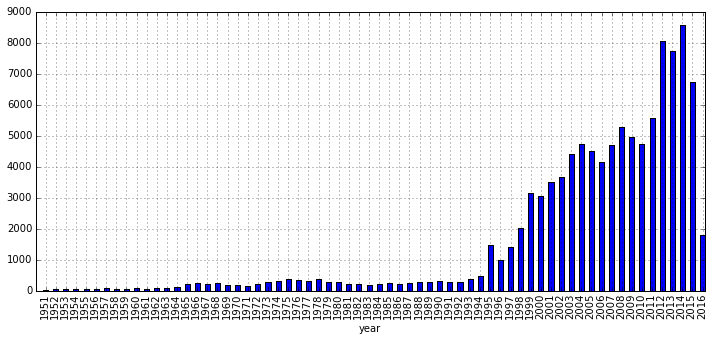

In [51]:
query = """
select 
    sum(Count) as count, 
    year 
from ufo_withyear
where year > 1950
group by year
order by year
"""
pandas_ufos_withyears = sqlContext.sql(query).toPandas()
pandas_ufos_withyears.plot(kind='bar', x='year', y='count', figsize=(12, 5))